In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
mal = pd.read_csv('Malaria screener.csv')

In [3]:
mal.head()

,DHSID,GPS_Dataset,DHSCC,DHSYEAR,DHSCLUST,SurveyID,All_Population_Count_2000,All_Population_Count_2005,All_Population_Count_2010,All_Population_Count_2015,...,UN_Population_Density_2000,UN_Population_Density_2005,UN_Population_Density_2010,UN_Population_Density_2015,UN_Population_Density_2020,Wet_Days_2000,Wet_Days_2005,Wet_Days_2010,Wet_Days_2015,Wet_Days_2020
0,NG202100000001,NGGE81FL,NG,2021,1,NG2021MIS,4383.732422,10511.250980,15821.37695,12767.423830,...,122.340126,137.952301,156.200867,176.804611,198.476639,7.454952,7.298984,7.694158,7.095560,7.626615
1,NG202100000002,NGGE81FL,NG,2021,2,NG2021MIS,10095.720700,13841.389650,15144.12500,17101.576170,...,328.920227,370.894653,419.957245,475.351868,533.618652,7.029486,6.815495,7.203261,6.596217,7.128038
2,NG202100000003,NGGE81FL,NG,2021,3,NG2021MIS,34067.722660,44976.214840,55211.96875,55673.691410,...,175.446625,197.835861,224.005936,253.553528,284.633148,8.311914,8.184244,8.568884,8.013810,8.531879
3,NG202100000004,NGGE81FL,NG,2021,4,NG2021MIS,4087.095947,5683.123535,6247.22168,9392.799805,...,155.192780,174.997360,198.146332,224.282898,251.774643,8.987461,8.872630,9.269448,8.747023,9.237495
4,NG202100000005,NGGE81FL,NG,2021,5,NG2021MIS,543.357239,545.644714,962.36676,1112.796753,...,62.213058,70.152237,79.432098,89.909622,100.930397,6.834844,6.670360,6.903941,6.319201,6.890534


In [4]:
mal.shape

(567, 135)

In [5]:
mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Columns: 135 entries, DHSID to Wet_Days_2020
dtypes: float64(123), int64(8), object(4)
memory usage: 598.1+ KB


In [6]:
mal.columns.tolist()

['DHSID',
 'GPS_Dataset',
 'DHSCC',
 'DHSYEAR',
 'DHSCLUST',
 'SurveyID',
 'All_Population_Count_2000',
 'All_Population_Count_2005',
 'All_Population_Count_2010',
 'All_Population_Count_2015',
 'All_Population_Count_2020',
 'Aridity_2000',
 'Aridity_2005',
 'Aridity_2010',
 'Aridity_2015',
 'Aridity_2020',
 'Day_Land_Surface_Temp_2000',
 'Day_Land_Surface_Temp_2005',
 'Day_Land_Surface_Temp_2010',
 'Day_Land_Surface_Temp_2015',
 'Day_Land_Surface_Temp_2020',
 'Diurnal_Temperature_Range_2000',
 'Diurnal_Temperature_Range_2005',
 'Diurnal_Temperature_Range_2010',
 'Diurnal_Temperature_Range_2015',
 'Diurnal_Temperature_Range_2020',
 'Drought_Episodes',
 'Elevation',
 'Enhanced_Vegetation_Index_2000',
 'Enhanced_Vegetation_Index_2005',
 'Enhanced_Vegetation_Index_2010',
 'Enhanced_Vegetation_Index_2015',
 'Enhanced_Vegetation_Index_2020',
 'Frost_Days_2000',
 'Frost_Days_2005',
 'Frost_Days_2010',
 'Frost_Days_2015',
 'Frost_Days_2020',
 'Global_Human_Footprint',
 'Growing_Season_Length'

In [7]:
# Selection of features. Features that were strongly correlated with malaria prevalence were selected

pd.set_option('display.max_rows',135)
correlations = mal.corr()
print(correlations['Malaria_Prevalence_2020'].sort_values(ascending=False))

Malaria_Prevalence_2020           1.000000
Malaria_Incidence_2020            0.948468
Malaria_Prevalence_2005           0.766118
Enhanced_Vegetation_Index_2005    0.668044
Enhanced_Vegetation_Index_2000    0.667497
Enhanced_Vegetation_Index_2015    0.663037
Enhanced_Vegetation_Index_2010    0.657760
Enhanced_Vegetation_Index_2020    0.644609
Wet_Days_2000                     0.585939
Malaria_Prevalence_2000           0.580782
Temperature_January               0.575995
Growing_Season_Length             0.569691
Wet_Days_2015                     0.569533
Wet_Days_2010                     0.565684
Wet_Days_2005                     0.555895
Temperature_December              0.555140
Malaria_Incidence_2005            0.553630
Wet_Days_2020                     0.528238
Aridity_2010                      0.510739
Aridity_2000                      0.508837
Temperature_February              0.507815
ITN_Coverage_2000                 0.505325
Aridity_2015                      0.494823
Precipitati

In [8]:
selected_features = [
    'Malaria_Prevalence_2020',  # Target variable
    'Nightlights_Composite',   # Proxy for economic activity
    'UN_Population_Density_2020',  # Population density
    'Travel_Times',  # Access to healthcare
    'ITN_Coverage_2020',  # Insecticide-treated net coverage
    'Malaria_Incidence_2020',
    'Enhanced_Vegetation_Index_2020',
    'Wet_Days_2000',
    'Temperature_January',
    'Growing_Season_Length',
    'Aridity_2010',
    'PET_2020',
    'Day_Land_Surface_Temp_2005',
    'Diurnal_Temperature_Range_2020',
]

In [9]:
# Subset the data
analysis_mal = mal[selected_features]

In [10]:
# Check for missing values in the selected columns
missing_values = analysis_mal.isnull().sum()

# Drop rows with missing values for simplicity
analysis_mal_clean = analysis_mal.dropna()

# Display summary of the cleaned dataset
analysis_mal_clean.describe(), missing_values

(       Malaria_Prevalence_2020  Nightlights_Composite  \
 count               567.000000             567.000000   
 mean                  0.271636               1.654022   
 std                   0.128614               6.068419   
 min                   0.052831               0.000000   
 25%                   0.184202               0.000000   
 50%                   0.259956               0.047433   
 75%                   0.339924               1.069000   
 max                   0.691903              83.385368   
 
        UN_Population_Density_2020  Travel_Times  ITN_Coverage_2020  \
 count                  567.000000    567.000000         567.000000   
 mean                  1095.423879     26.266518           0.387221   
 std                   2981.150999     45.689079           0.198056   
 min                     25.978039      0.000000           0.057542   
 25%                    167.933380      4.171875           0.227603   
 50%                    348.623779     13.456055  

In [11]:
# Remove Outliers
# Define a function to remove outliers based on the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the selected columns
analysis_mal_clean = remove_outliers(analysis_mal_clean, selected_features)

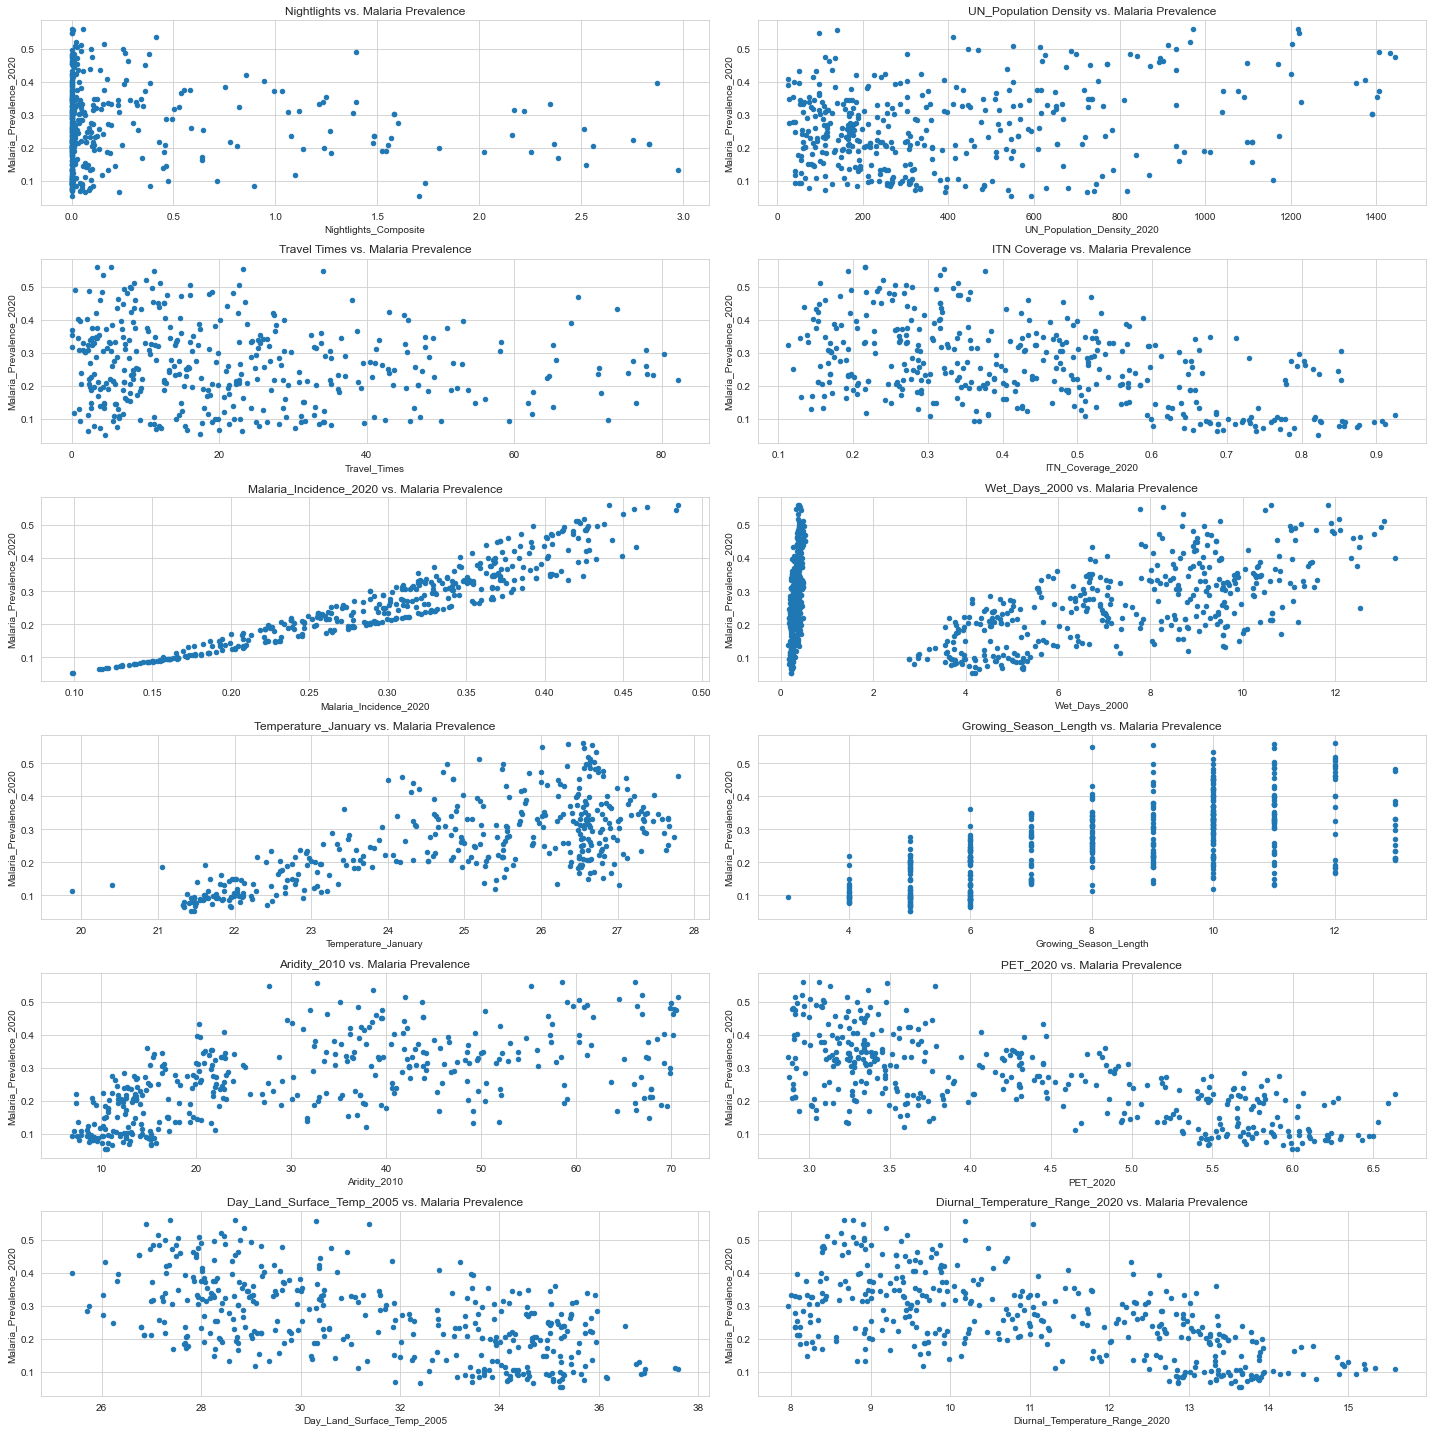

In [12]:
# Visualizing the relationships between the features and malaria prevalence
# Set the visual style
sns.set_style("whitegrid")

# Visualize the relationship between malaria prevalence and each socioeconomic factor
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

# Nightlights Composite vs. Malaria Prevalence
analysis_mal_clean.plot.scatter(x='Nightlights_Composite', y='Malaria_Prevalence_2020', ax=axes[0, 0])
axes[0, 0].set_title("Nightlights vs. Malaria Prevalence")

# Population Density vs. Malaria Prevalence
#sns.scatterplot(x='UN_Population_Density_2020', y='Malaria_Prevalence_2020', mal=analysis_mal_clean, ax=axes[0, 1])
analysis_mal_clean.plot.scatter(x='UN_Population_Density_2020', y='Malaria_Prevalence_2020', ax=axes[0, 1])
axes[0, 1].set_title("UN_Population Density vs. Malaria Prevalence")

# Travel Times vs. Malaria Prevalence
analysis_mal_clean.plot.scatter(x='Travel_Times', y='Malaria_Prevalence_2020', ax=axes[1, 0])
axes[1, 0].set_title("Travel Times vs. Malaria Prevalence")

# ITN Coverage vs. Malaria Prevalence
analysis_mal_clean.plot.scatter(x='ITN_Coverage_2020', y='Malaria_Prevalence_2020', ax=axes[1, 1])
axes[1, 1].set_title("ITN Coverage vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Malaria_Incidence_2020', y='Malaria_Prevalence_2020', ax=axes[2, 0])
axes[2, 0].set_title("Malaria_Incidence_2020 vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Enhanced_Vegetation_Index_2020', y='Malaria_Prevalence_2020', ax=axes[2, 1])
axes[2, 1].set_title("Enhanced_Vegetation_Index_2020 vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Wet_Days_2000', y='Malaria_Prevalence_2020', ax=axes[2, 1])
axes[2, 1].set_title("Wet_Days_2000 vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Temperature_January', y='Malaria_Prevalence_2020', ax=axes[3, 0])
axes[3, 0].set_title("Temperature_January vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Growing_Season_Length', y='Malaria_Prevalence_2020', ax=axes[3, 1])
axes[3, 1].set_title("Growing_Season_Length vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Aridity_2010', y='Malaria_Prevalence_2020', ax=axes[4, 0])
axes[4, 0].set_title("Aridity_2010 vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='PET_2020', y='Malaria_Prevalence_2020', ax=axes[4, 1])
axes[4, 1].set_title("PET_2020 vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Day_Land_Surface_Temp_2005', y='Malaria_Prevalence_2020', ax=axes[5, 0])
axes[5, 0].set_title("Day_Land_Surface_Temp_2005 vs. Malaria Prevalence")

analysis_mal_clean.plot.scatter(x='Diurnal_Temperature_Range_2020', y='Malaria_Prevalence_2020', ax=axes[5, 1])
axes[5, 1].set_title("Diurnal_Temperature_Range_2020 vs. Malaria Prevalence")

plt.tight_layout()
plt.show()

In [12]:
X = analysis_mal_clean[['Nightlights_Composite', 'UN_Population_Density_2020', 'Travel_Times', 'ITN_Coverage_2020', 'Malaria_Incidence_2020','Enhanced_Vegetation_Index_2020','Wet_Days_2000', 'Temperature_January','Growing_Season_Length','Aridity_2010','PET_2020','Day_Land_Surface_Temp_2005','Diurnal_Temperature_Range_2020']]
y = analysis_mal_clean['Malaria_Prevalence_2020']

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Add a constant for the intercept in regression
X = sm.add_constant(X)

In [15]:
# Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

In [16]:
# Display regression results
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Malaria_Prevalence_2020   R-squared:                       0.963
Model:                                 OLS   Adj. R-squared:                  0.962
Method:                      Least Squares   F-statistic:                     761.3
Date:                     Sat, 19 Jul 2025   Prob (F-statistic):          2.69e-262
Time:                             22:07:36   Log-Likelihood:                 925.47
No. Observations:                      393   AIC:                            -1823.
Df Residuals:                          379   BIC:                            -1767.
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(314, 14)
(79, 14)
(314,)
(79,)


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0005799696326884039
R-squared: 0.9581081440788574


In [20]:
# Fit a RFR model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate performance
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

R-squared: 0.9825916018006386
mse: 0.0002410096685232207


In [21]:
# Fit a ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

R-squared: 0.9578752997658547
mse: 0.0005831932337372559


In [22]:
# Cross validation scores
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Mean R-squared across folds: {cv_scores.mean()}")

Mean R-squared across folds: 0.9323696932309484


In [23]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [24]:
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]
stack_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('ridge', Ridge())],
                  final_estimator=LinearRegression())

In [25]:
# Stacked Model
stacked_model = StackingRegressor(
    estimators=[
        ('linear_regression', LinearRegression()),
        ('ridge', Ridge(alpha=1.0)),
        ('rf', RandomForestRegressor(random_state=42))
    ],
    final_estimator=LinearRegression()
)
stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('linear_regression', LinearRegression()),
                              ('ridge', Ridge()),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [26]:
 #Predictions
y_pred_linear_regression = linear_regression.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_stacked = stacked_model.predict(X_test)

In [27]:
#Evaluate Models
models = {
    'Linear Regression': y_pred_linear_regression,
    'Ridge Regression': y_pred_ridge,
    'Random Forest': y_pred_rf,
    'Stacked Model': y_pred_stacked
}

In [28]:
# Calculate R-squared for each model
for model_name, y_pred in models.items():
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R-squared: {r2:.4f}")
    print(f"mse: {mean_squared_error(y_test, y_pred_stacked)}")

Linear Regression R-squared: 0.9581
mse: 0.00025544686990196534
Ridge Regression R-squared: 0.9579
mse: 0.00025544686990196534
Random Forest R-squared: 0.9826
mse: 0.00025544686990196534
Stacked Model R-squared: 0.9815
mse: 0.00025544686990196534


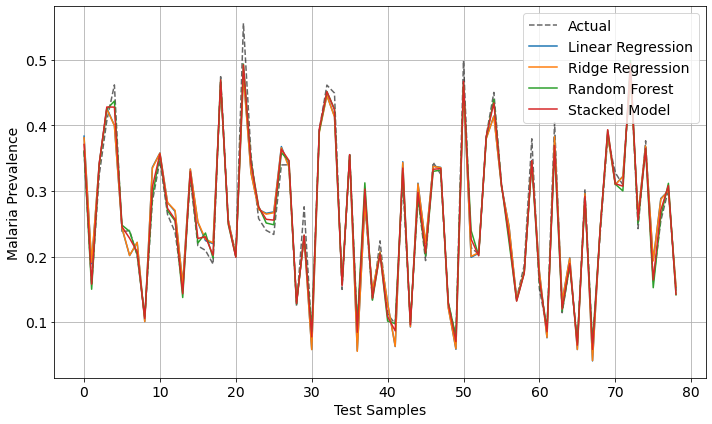

In [29]:
#Plot the Models
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', alpha=0.6, linestyle='dashed')

for model_name, y_pred in models.items():
    plt.plot(y_pred, label=model_name)

#plt.title("Model Predictions vs. Actual Values")
plt.xlabel("Test Samples", fontsize=14)
plt.ylabel("Malaria Prevalence", fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Errors')

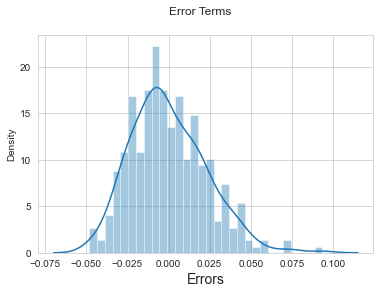

In [30]:
y_train_pi = linear_regression.predict(X_train)

#plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pi), bins =30)
fig.suptitle('Error Terms', fontsize=12)
plt.xlabel('Errors', fontsize=14)

In [31]:
y_pred_train =linear_regression.predict(X_train)
print('Coefficients:', linear_regression.coef_)
print('Intercept:', linear_regression.intercept_)
print("Trainingscore : " , linear_regression.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Coefficients: [ 0.         -0.00288953  0.00665337 -0.00332121  0.00441353  0.10439559
  0.01340577  0.0061469  -0.01650641 -0.01178421  0.01477895 -0.02231314
 -0.00600142  0.00859609]
Intercept: 0.26336558588400133
Trainingscore :  0.9638325555760022
Mean Absolute Error: 0.018190360865356185
Mean Squared Error: 0.0005211900165995011
Root Mean Squared Error: 0.022829586430759125


In [32]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [33]:
y_pred_test =linear_regression.predict(X_test)
print('Coefficients:', linear_regression.coef_)
print('Intercept:', linear_regression.intercept_)
print("Testingscore : ", r2_score(y_test, y_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Coefficients: [ 0.         -0.00288953  0.00665337 -0.00332121  0.00441353  0.10439559
  0.01340577  0.0061469  -0.01650641 -0.01178421  0.01477895 -0.02231314
 -0.00600142  0.00859609]
Intercept: 0.26336558588400133
Testingscore :  0.9581081440788574
Mean Absolute Error: 0.01909889260261547
Mean Squared Error: 0.0005799696326884039
Root Mean Squared Error: 0.024082558682341125


In [35]:
yintercept = '%.2f' % linear_regression.intercept_
NC = '%.2f NC' % linear_regression.coef_[0]
PD = '%.4f PD' % linear_regression.coef_[1]
TT = '%.4f TT' % linear_regression.coef_[2]
ITN = '%.2f ITN' % linear_regression.coef_[3]
MI = '%.4f MI' % linear_regression.coef_[4]
EVI = '%.4f EVI' % linear_regression.coef_[5]
WD = '%.2f WD' % linear_regression.coef_[6]
TJ = '%.4f TJ' % linear_regression.coef_[7]
GSL = '%.4f GSL' % linear_regression.coef_[8]
ARI = '%.2f ARI' % linear_regression.coef_[9]
PET = '%.4f PET' % linear_regression.coef_[10]
DLS = '%.4f DLS' % linear_regression.coef_[11]
DTR = '%.2f DTR' % linear_regression.coef_[12]
print('MalPre = ' + ' ' + yintercept + ' ' + NC + ' ' + PD + ' ' + TT + ' ' + ITN + ' ' + MI + ' ' + EVI + ' ' + WD + ' ' + TJ + ' ' + GSL + ' ' + ARI + ' ' + PET + ' ' + DLS + ' ' + DTR)

MalPre =  0.26 0.00 NC -0.0029 PD 0.0067 TT -0.00 ITN 0.0044 MI 0.1044 EVI 0.01 WD 0.0061 TJ -0.0165 GSL -0.01 ARI 0.0148 PET -0.0223 DLS -0.01 DTR


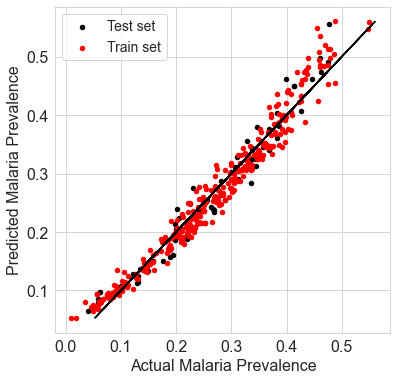

In [30]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(linear_regression.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(linear_regression.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('Actual Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);

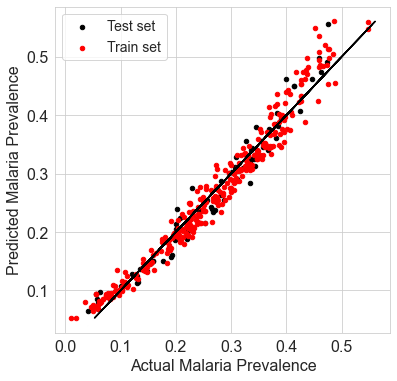

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(ridge_model.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(ridge_model.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('Actual Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);

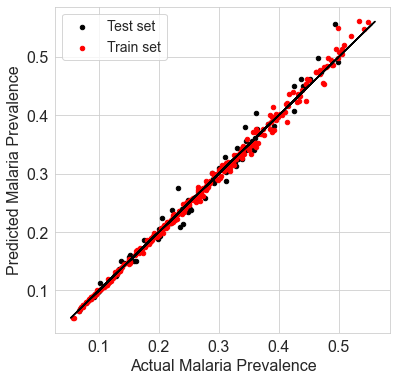

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(rf_model.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(rf_model.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('Actual Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);

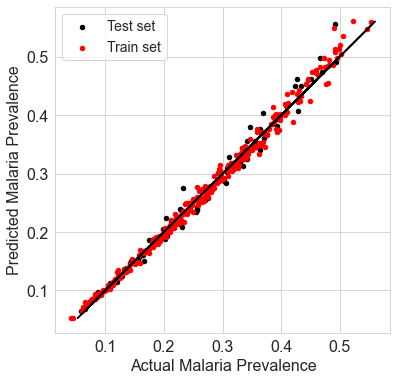

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(stacked_model.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(stacked_model.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlabel('Actual Malaria Prevalence', fontsize=16)
ax.set_ylabel('Predicted Malaria Prevalence', fontsize=16);

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Define the data
data = {
    'Feature': [
        'Nightlights_Composite', 'UN_Population_Density_2020', 'Travel_Times',
        'ITN_Coverage_2020', 'Malaria_Incidence_2020', 'Enhanced_Vegetation_Index_2020',
        'Wet_Days_2000', 'Temperature_January', 'Growing_Season_Length',
        'Aridity_2010', 'PET_2020', 'Day_Land_Surface_Temp_2005',
        'Diurnal_Temperature_Range_2020'
    ],
    'Coefficient': [
        -0.0015, 0.0072, -0.0025, 0.0060, 0.1043, 0.0162,
        0.0051, -0.0134, -0.0155, 0.0168, -0.0237, -0.0057, 0.0109
    ],
    'p_value': [
        0.318, 0.000, 0.071, 0.001, 0.000, 0.000,
        0.436, 0.000, 0.048, 0.002, 0.004, 0.221, 0.078
    ]
}

df_coef = pd.DataFrame(data)
df_coef['Significance'] = df_coef['p_value'] < 0.05  # Add significance label
df_coef.sort_values('Coefficient', inplace=True)


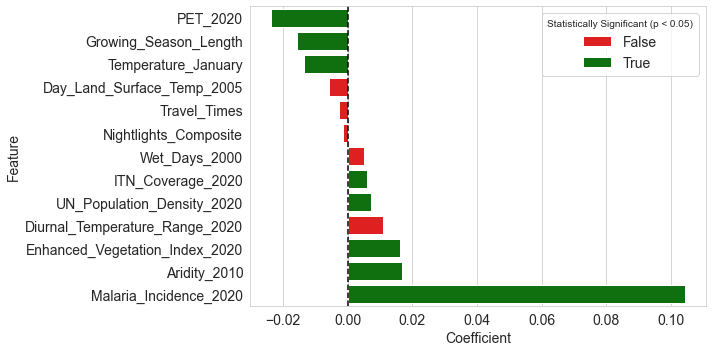

In [38]:
# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=df_coef, y='Feature', x='Coefficient', hue='Significance',
            dodge=False, palette={True: 'green', False: 'red'})
plt.axvline(0, color='black', linestyle='--')
#plt.title('📊 Coefficient Plot of Predictors on Malaria Prevalence')
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Statistically Significant (p < 0.05)',fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()